importind dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
dataframe = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
dataframe.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
type(dataframe)

pandas.core.frame.DataFrame

In [6]:
dataframe.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataframe.shape

(614, 13)

In [10]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
dataframe=dataframe.dropna()

In [16]:
dataframe.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

using label encoding 

In [ ]:
#we use label encoding to convert textual target to numerical target variablle for better prediction 

In [18]:
dataframe.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-18-3d5eed9c7246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [19]:
dataframe.head(5
          )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
dataframe['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
dataframe.replace({'Dependents':{'3+':4}},inplace=True)

<ipython-input-21-6dbb2156acd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.replace({'Dependents':{'3+':4}},inplace=True)


In [22]:
dataframe['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

data visualiation

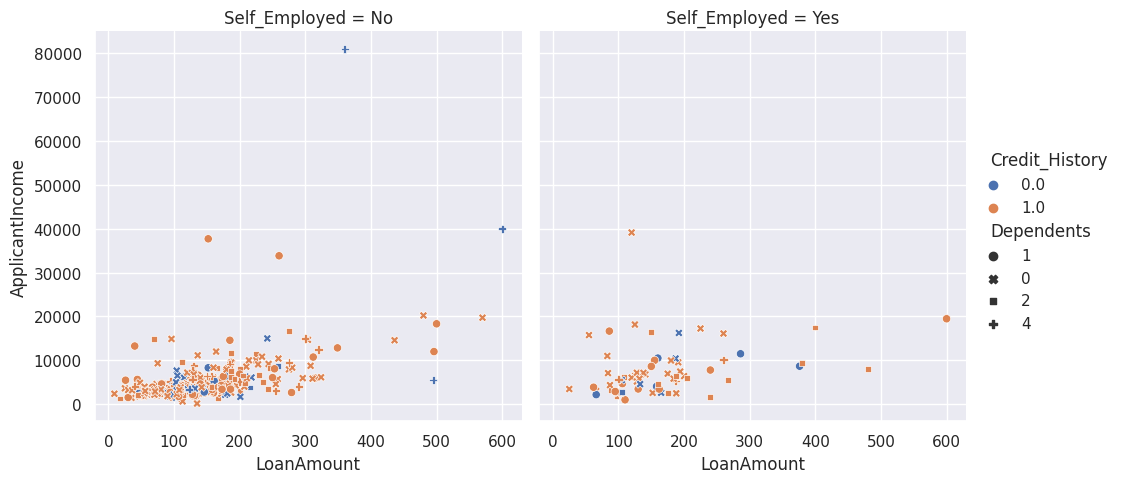

In [27]:
sns.set_theme()
sns.relplot(data=dataframe,x='LoanAmount',y='ApplicantIncome',col='Self_Employed',hue='Credit_History',style='Dependents')

In [ ]:
dataframe.head(5
          )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [32]:
dataframe.replace({'Married':{'Yes':1,'No':0}},inplace=True)
dataframe.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
dataframe.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
dataframe.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
dataframe.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


<ipython-input-32-b86b17c8fc60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.replace({'Married':{'Yes':1,'No':0}},inplace=True)
<ipython-input-32-b86b17c8fc60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
<ipython-input-32-b86b17c8fc60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [33]:
dataframe.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [47]:
x=dataframe.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=dataframe['Loan_Status']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.1,random_state=1,stratify=y)
print(x_train.shape)
print(x_test.shape)

(48, 11)
(432, 11)


TRAINING THE MODEL (SUPPORT VECTOR MACHINE)

In [53]:
classifier = svm.SVC(kernel='linear')

In [54]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [59]:
print('accuracy on training data :',training_data_accuracy)

accuracy on training data : 0.5833333333333334


In [60]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [61]:
print('accuracy on test data :',test_data_accuracy)

accuracy on test data : 0.5925925925925926


making predictive 

In [65]:
input = (1,1,0,1,1,3000,0,66,360,1,2)
input_data_as_numpy_array = np.asarray(input)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)


print(prediction)
if (prediction[0]==1):
  print('Loan Approved ')
else:
  print('loan not Approved')

[1]
Loan Approved 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
